In [339]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# Leitura dos dados

In [301]:
#Carregamento dos dados
data = pd.read_csv('data.csv', delimiter=',')

# Inspecionando primeiras linhas

In [302]:
#Primeiras linhas
data.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


# Inspecionando últimas linhas

In [303]:
#últimas linhas
data.tail()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
7325,2010,270000000264,ROBERTO PEREIRA URBANO,TO,PSC,3,3,3370.00,1123.333333,370.00,...,16,16,3363.41,210.213125,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,3013
7326,2010,270000000265,RONALDO DIMAS NOGUEIRA PEREIRA,TO,PR,715,706,1034323.16,1465.046969,211804.58,...,1658,1275,815638.26,639.716282,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,35980
7327,2010,270000000266,SÉRGIO PERIN,TO,PTB,2,2,2600.00,1300.000000,NaN,...,2,2,2600.00,1300.000000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),ODONTÓLOGO,20
7328,2010,270000000267,ÍTALO MARCEL COSTA CONCEIÇÃO,TO,PR,2,2,5175.00,2587.500000,3375.00,...,2,2,5175.00,2587.500000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BANCÁRIO E ECONOMIÁRIO,293
7329,2010,270000000501,LEONAM XAVIER GOMES,TO,PPS,13,12,33852.82,2821.068333,30083.67,...,47,46,36739.62,798.687391,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,1248


# Removendo pouco discriminatórias e redundâncias

Obervando inicialmente as colunas que caracterizam os os dados, percebemos que, se quizermos predizer a quantidade de votos que um candidato terá, é necessário analisar quais colunas realmente são discriminatórias para quantidade de votos obtidos por um candidato.

A coluna "ano" pouco diz sobre a quantidade de votos que o candidato recebeu, imagenemos que em 2006 o candidato recebeu 20 mil votos e em 2010 recebeu 30 mil. O ano em sí, não caracteriza o aumento de votos, mas o conjunto de fatores que mudaram de um ano eletivo para o outro. Logo, essa coluna não será considerada para a construção do modelo.

As colunas "sequencial_candidato", "nome", "cargo" e "ocupação" são apenas informativas para caracterizar o candidato dentro do conjunto de informações, tabém não serão consideradas.

Analisando as colunas "quantidade_doacoes" e "quantidade_doadores", podemos obervar que elas possuem informações redundantes, visto que para a maior parte dos candidatos a quantidade de doações é explicada pela quantidade de doadores, ou seja, sempre que existe um doador existirá uma doação. Logo, a coluna "quantidade_doadores" não será considerada.

Dentre as colunas "quantidade_despesas" e "quantidade_fornecedores", consideramos o mesmo posicionamento da "quantidade_doacoes". Logo, a coluna "quantidade_fornecedores" não será considerada.

Sendo assim, as colunas que serão usadas para treinar os modelos e tentar predizer a quantidade de votos indicado na coluna "votos" (variável alvo) são:

"uf": (character)

"partido": (character)

"quantidade_doacoes": (integer)

"total_receita": (double) soma em R$ das doações

"media_receita": (double) média das doações

"recursos_de_outros_candidatos/comites": (double) quantia em R$ das doações provenientes de outros candidatos ou comite partidário

"recursos_de_pessoas_fisicas": (double) quantia em R$ das doações provenientes de outros CPFs

"recursos_de_pessoas_juridicas": (double) quantia em R$ das doações provenientes de outros CNPJ

"recursos_proprios": (double) quantia em R$ das doações provenientes do próprio candidato

"quantidade_despesas": (integer)

"total_despesa": (double) soma em R$ das despesas de campanha

"media_despesa": (double) média das despesas de campanha

"Sexo":  (character)

"grau": (character) grau de instrução do candidato

"estado_civil": (character)

In [304]:
#Removendo colunas com dados irrelevantes e redundantes
data = data.drop(['cargo', 'ocupacao' , 'sequencial_candidato', 'nome', 'quantidade_doadores', 'quantidade_fornecedores'], axis=1)

# Normalizando informações quantitativas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EFC0517F0>,
      dtype=object)

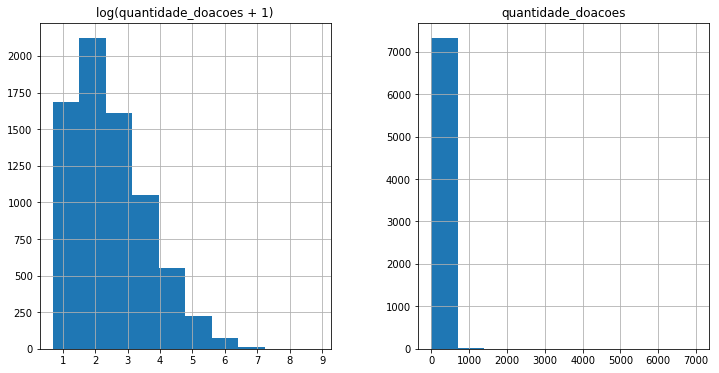

In [305]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_outros_candidatos"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

qtd_doacoes = pd.DataFrame({"quantidade_doacoes":data["quantidade_doacoes"], "log(quantidade_doacoes + 1)":np.log1p(data["quantidade_doacoes"])})
qtd_doacoes.hist()

Na amostra original da coluna "quantidade_doacoes", vemos que, antes da aplicação da normalização, os dados estão concentrados a direita e, após a aplicação da normalização, os dados ficaram melhor distribuídos. Iremos analisar a necessidade para as demais colunas, mas só aplicaremos a normalizalção nas que realmente necessitarem.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E802E4FD0>,
      dtype=object)

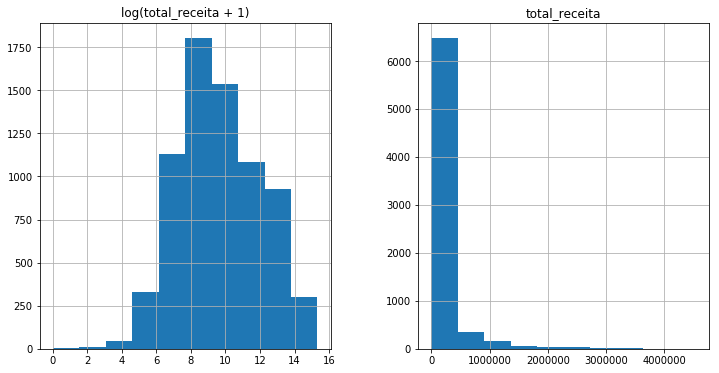

In [306]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "total_receita"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

total_receita = pd.DataFrame({"total_receita":data["total_receita"], "log(total_receita + 1)":np.log1p(data["total_receita"])})
total_receita.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E802E4940>,
      dtype=object)

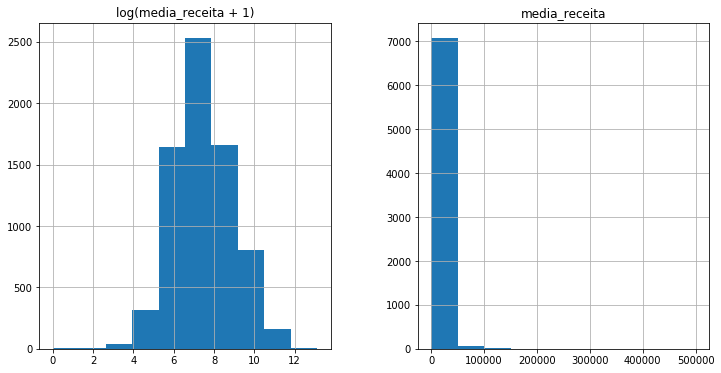

In [307]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "media_receita"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

media_receita = pd.DataFrame({"media_receita":data["media_receita"], "log(media_receita + 1)":np.log1p(data["media_receita"])})
media_receita.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E806D4B70>,
      dtype=object)

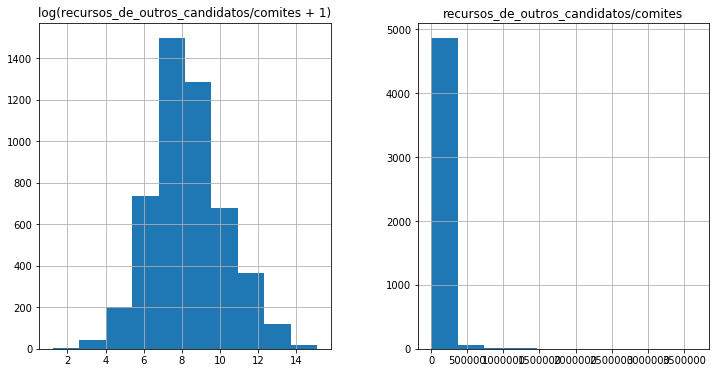

In [308]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_outros_candidatos/comites"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_de_outros_candidatos_comites = pd.DataFrame({"recursos_de_outros_candidatos/comites":data["recursos_de_outros_candidatos/comites"], "log(recursos_de_outros_candidatos/comites + 1)":np.log1p(data["recursos_de_outros_candidatos/comites"])})
recursos_de_outros_candidatos_comites.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E8049D9E8>,
      dtype=object)

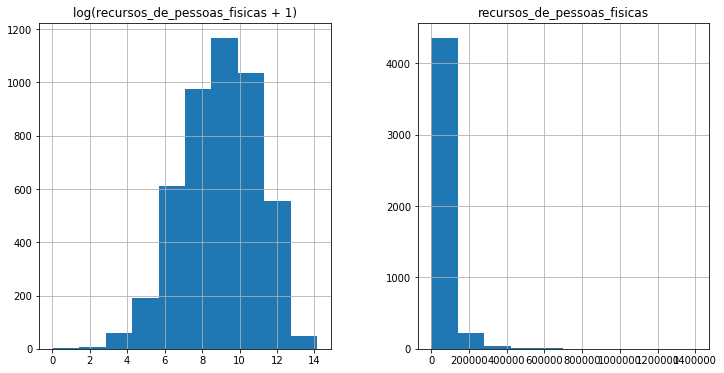

In [309]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_pessoas_fisicas"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_de_pessoas_fisicas = pd.DataFrame({"recursos_de_pessoas_fisicas":data["recursos_de_pessoas_fisicas"], "log(recursos_de_pessoas_fisicas + 1)":np.log1p(data["recursos_de_pessoas_fisicas"])})
recursos_de_pessoas_fisicas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E80AEC080>,
      dtype=object)

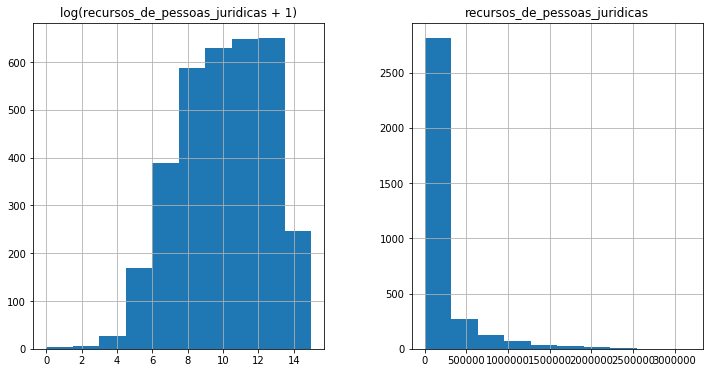

In [310]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_pessoas_juridicas"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_de_pessoas_juridicas = pd.DataFrame({"recursos_de_pessoas_juridicas":data["recursos_de_pessoas_juridicas"], "log(recursos_de_pessoas_juridicas + 1)":np.log1p(data["recursos_de_pessoas_juridicas"])})
recursos_de_pessoas_juridicas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E80492C88>,
      dtype=object)

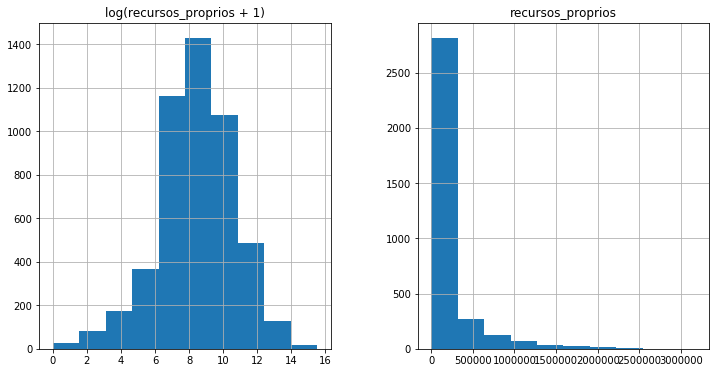

In [311]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_proprios"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_proprios = pd.DataFrame({"recursos_proprios":data["recursos_de_pessoas_juridicas"], "log(recursos_proprios + 1)":np.log1p(data["recursos_proprios"])})
recursos_proprios.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E80EE4C50>,
      dtype=object)

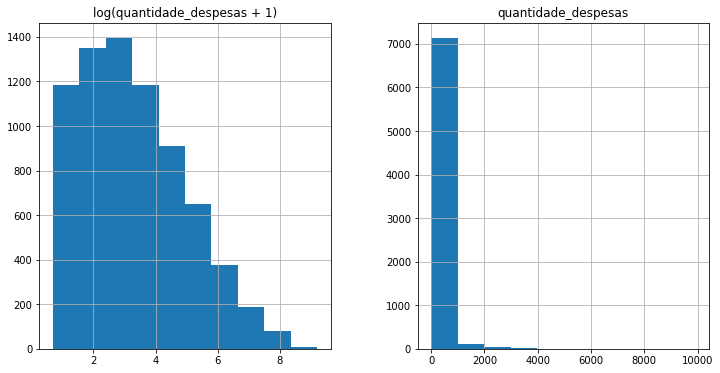

In [312]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "quantidade_despesas"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

quantidade_despesas = pd.DataFrame({"quantidade_despesas":data["quantidade_despesas"], "log(quantidade_despesas + 1)":np.log1p(data["quantidade_despesas"])})
quantidade_despesas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E80ED2710>,
      dtype=object)

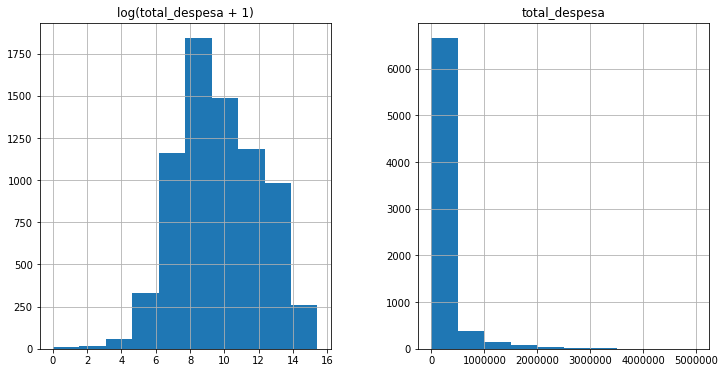

In [313]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "total_despesa"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

total_despesa = pd.DataFrame({"total_despesa":data["total_despesa"], "log(total_despesa + 1)":np.log1p(data["total_despesa"])})
total_despesa.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E80D868D0>,
      dtype=object)

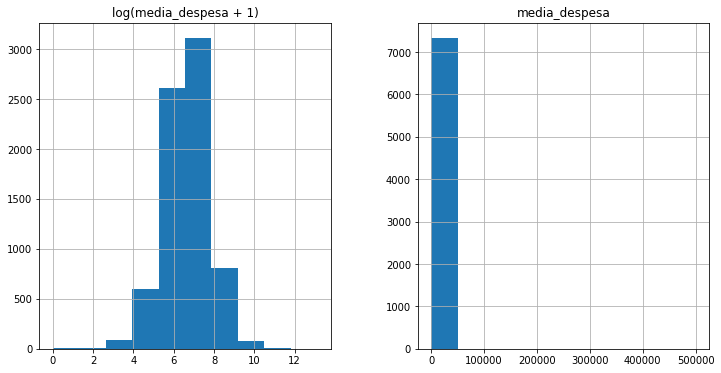

In [314]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "media_despesa"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

media_despesa = pd.DataFrame({"media_despesa":data["media_despesa"], "log(media_despesa + 1)":np.log1p(data["media_despesa"])})
media_despesa.hist()

Obervando as disctribuilões originais de todas as colunas com informações numéricas, percebemos que todas precisam passar por um processo de normalização dos dados.

In [315]:
#Transformando os dados originais em dados normalizados
#log transform skewed numeric features:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

In [316]:
#Primeiras linhas
data.head()

,ano,uf,partido,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,media_despesa,sexo,grau,estado_civil,votos
0,2006,AP,PT,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,9.716230,7.077956,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),9.057189
1,2006,RO,PT,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,9.919705,6.785292,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),7.922261
2,2006,AP,PT,2.890372,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,11.891449,7.210050,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),9.765891
3,2006,MS,PRONA,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,8.007074,5.929961,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),7.085064
4,2006,RO,PT,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,11.664939,6.878469,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),10.288818


In [317]:
#Últimas linhas
data.tail()

,ano,uf,partido,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,media_despesa,sexo,grau,estado_civil,votos
7325,2010,TO,PSC,1.386294,8.122965,7.024946,5.916202,NaN,NaN,8.006701,2.833213,8.121008,5.352868,MASCULINO,SUPERIOR COMPLETO,CASADO(A),8.011023
7326,2010,TO,PR,6.573680,13.849259,7.290325,12.263424,12.975068,12.063939,10.257694,7.413970,13.611727,6.462587,MASCULINO,SUPERIOR COMPLETO,CASADO(A),10.490746
7327,2010,TO,PTB,1.098612,7.863651,7.170888,NaN,NaN,NaN,6.398595,1.098612,7.863651,7.170888,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),3.044522
7328,2010,TO,PR,1.098612,8.551788,7.858834,8.124447,7.496097,NaN,NaN,1.098612,8.551788,7.858834,MASCULINO,SUPERIOR COMPLETO,CASADO(A),5.683580
7329,2010,TO,PPS,2.639057,10.429807,7.945225,10.311771,6.216606,NaN,8.743556,3.871201,10.511638,6.684221,MASCULINO,SUPERIOR COMPLETO,CASADO(A),7.130099


# Tratando dados inexistentes

Obervando os dados para construção do modelo, percebemos que algumas colunas estão sem informação (NA). Vamos tratar esses dados preenchendo-os com a mediana da coluna a qual ele pertence.

In [318]:
# Colunas com valores numéricos
columns_values = ['quantidade_doacoes', 'total_receita', 'media_receita', 
                    'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
                    'recursos_proprios', 'quantidade_despesas', 'total_despesa', 'media_despesa']

columns_categories = ['uf','partido', 'sexo', 'grau', 'estado_civil']

# TRanformando dados categóricos
data_dummies = pd.get_dummies(pd.DataFrame(data[columns_categories]))

# Inserindo a mediana de cada coluna no valores NA de cada coluna
data_values = data[columns_values]
data[columns_values] = data_values.fillna(data_values.median())

# Unindo os novos dados categóricos com os novos dados para valores NA
data = pd.concat([data, data_dummies], axis=1, sort=False)

# Removendo colunas categóricas originais
data_processed = data.drop(columns_categories, axis=1)

In [319]:
#Primeiras linhas
data_processed.head()

,ano,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,...,grau_ENSINO MÉDIO COMPLETO,grau_ENSINO MÉDIO INCOMPLETO,grau_LÊ E ESCREVE,grau_SUPERIOR COMPLETO,grau_SUPERIOR INCOMPLETO,estado_civil_CASADO(A),estado_civil_DIVORCIADO(A),estado_civil_SEPARADO(A) JUDICIALMENTE,estado_civil_SOLTEIRO(A),estado_civil_VIÚVO(A)
0,2006,1.945910,9.717218,7.925760,8.167230,9.105091,8.748464,7.170888,2.708050,9.716230,...,1,0,0,0,0,1,0,0,0,0
1,2006,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,9.919705,...,0,0,0,1,0,0,0,0,1,0
2,2006,2.890372,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,11.891449,...,0,0,0,1,0,0,0,0,0,1
3,2006,1.945910,8.007074,6.216979,8.167230,7.048386,7.004991,6.621406,2.197225,8.007074,...,0,1,0,0,0,1,0,0,0,0
4,2006,3.891820,9.400695,7.340539,8.167230,10.837206,10.170492,11.141035,4.897840,11.664939,...,0,0,0,0,0,1,0,0,0,0


In [320]:
#Últimas linhas
data_processed.tail()

,ano,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,...,grau_ENSINO MÉDIO COMPLETO,grau_ENSINO MÉDIO INCOMPLETO,grau_LÊ E ESCREVE,grau_SUPERIOR COMPLETO,grau_SUPERIOR INCOMPLETO,estado_civil_CASADO(A),estado_civil_DIVORCIADO(A),estado_civil_SEPARADO(A) JUDICIALMENTE,estado_civil_SOLTEIRO(A),estado_civil_VIÚVO(A)
7325,2010,1.386294,8.122965,7.024946,5.916202,9.105091,10.170492,8.006701,2.833213,8.121008,...,0,0,0,1,0,1,0,0,0,0
7326,2010,6.573680,13.849259,7.290325,12.263424,12.975068,12.063939,10.257694,7.413970,13.611727,...,0,0,0,1,0,1,0,0,0,0
7327,2010,1.098612,7.863651,7.170888,8.167230,9.105091,10.170492,6.398595,1.098612,7.863651,...,0,0,0,0,1,1,0,0,0,0
7328,2010,1.098612,8.551788,7.858834,8.124447,7.496097,10.170492,8.517393,1.098612,8.551788,...,0,0,0,1,0,1,0,0,0,0
7329,2010,2.639057,10.429807,7.945225,10.311771,6.216606,10.170492,8.743556,3.871201,10.511638,...,0,0,0,1,0,1,0,0,0,0


# Dividindo dados em treinamento e teste

In [328]:
#Dados de treino
data_2006 = data_processed[:3388]
target_train = data_2006['votos']
data_train = data_2006.drop(['ano', 'votos'],axis=1)

#Dados de teste
data_2010 = data_processed[3389:]
target_teste = data_2010['votos']
data_teste = data_2010.drop(['ano', 'votos'],axis=1)

# Construindo modelos de regressão regularizados

In [356]:
#Método para retornar o erro (RMSE)
def rmse_cv(model, train, target):
    rmse= np.sqrt(-cross_val_score(model, train, target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [357]:
#Parâmetro de refinamento referente a taxa de regularização
alphas = [0, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

Testando modelo linear com regularização Ridge

Text(0, 0.5, 'Erro (RMSE)')

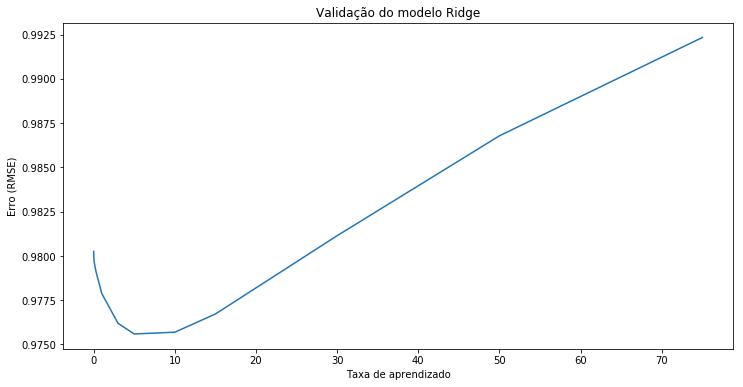

In [359]:
# Modelo ridge
model_ridge = Ridge()

# Computando o RMSE da validação cruzada
cv_ridge = [rmse_cv(Ridge(alpha = alpha), data_train, target_train).mean() 
            for alpha in alphas]

#Plotando RMSE do modelo Ridge para todos as taxas de aprendizado testadas por meio da validação cruzada
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validação do modelo Ridge")
plt.xlabel("Taxa de aprendizado")
plt.ylabel("Erro (RMSE)")

In [354]:
#RMSE mínimo
cv_ridge.min()

0.9755921563024487

O que podemos perceber é que o modelo linear Ridge para um parametro de regularização muito pequeno o RMSE dele é alto, no entanto, a medida com que se aumenta a taxa de regularização do modelo, o RMSE diminui até uma certa taxa e passa a crescer novamente. A taxa de regularização que mais reduziu o RMSE foi o alpha = 5 e obteve um RMSE = 0.9755921563024487.

Testando modelo linear com regularização Lasso